In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [4]:
boston = load_boston()

In [6]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

In [7]:
# 보스턴 데이터셋의 target배열은 주택 가격임.
# 이를 PRICE 컬럼으로 데이터프라임에 추가
bostonDF['PRICE'] = boston.target


In [8]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
bostonDF.shape

(506, 14)

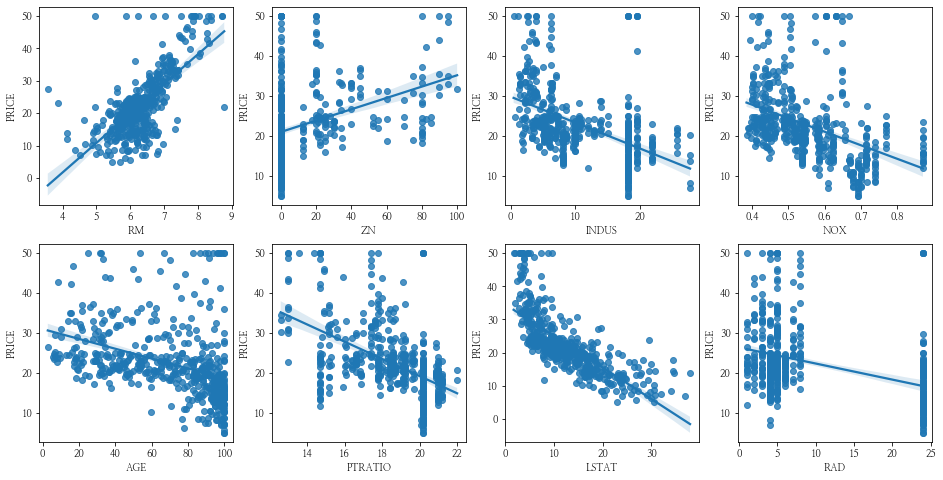

In [10]:
# 컬럼별 회귀 결과에 미치는 영향 시각화
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4*2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features): # 인덱스와 컬럼명이 나옴
    row = int(i/4) # 0,1,2,3 = 0 / 4,5,6,7 = 1
    col = i%4 # 0,1,2,3 = 0 / 4 = 1 / 5,6,7 = 0
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    test_size=0.3,
                                                    random_state=156)

In [ ]:
# y_target = bostonDF['PRICE']
# X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,
#                                                     test_size=0.3,
#                                                     random_state=156)

In [14]:
# 선형 회귀 OLS로 학습, 예측, 평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f'MSE: {mse:.3f}, RMSE: {rmse:.3f}')
print(f'R2 score: {r2:.3f}')

MSE: 17.297, RMSE: 4.159
R2 score: 0.757


In [17]:
# 회귀 계수 값(가중치)
np.round(lr.coef_, 1)

array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [18]:
# 절편 값(바이어스)
lr.intercept_

40.99559517216412

In [ ]:
# 다항 회귀 p329


In [ ]:
# 데이터에 대한 사전 지식이 있어야 데이터 전처리를 잘 할 수 있다.